In [1]:
import numpy as np


n_points = 200
x_points= np.random.uniform(0, 10, n_points)

sigma = 2000
noise = np.random.normal(0, sigma, 200)

def true_model(x):
    return 3000*x + 5000

y = true_model(x_points) + noise

x_all = np.array(x_points)
y_all = np.array(y)


indices = np.arange(n_points)
np.random.shuffle(indices)


tr_x = indices[:160]

te_x = indices[160:]

x_train = x_all[tr_x]
x_test = x_all[te_x]

y_train = y_all[tr_x]
y_test = y_all[te_x]

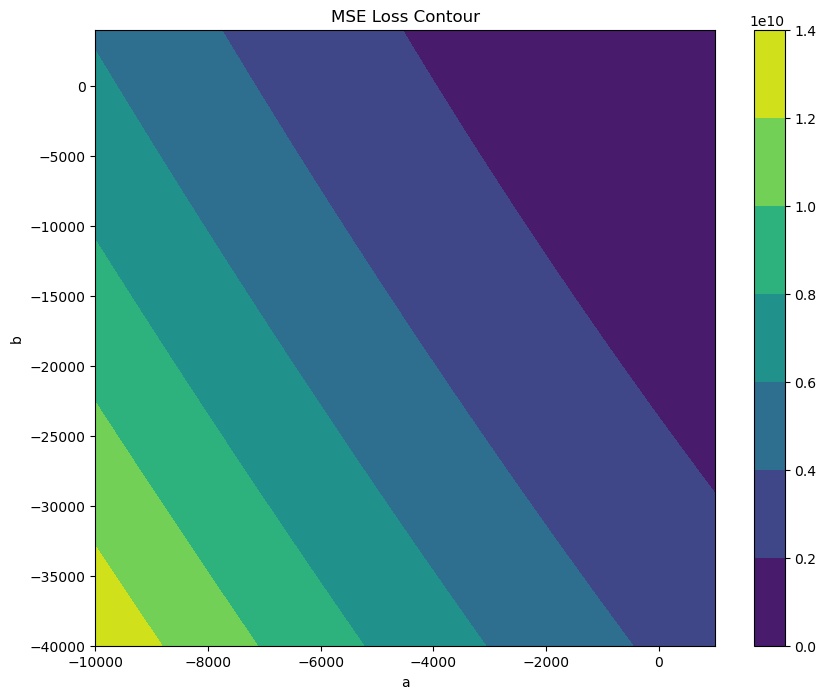

MSE Loss with true parameters on training data: [[1.35117205e+10 1.34390772e+10 1.33666381e+10 ... 3.14488384e+09
  3.11248439e+09 3.08028923e+09]
 [1.34633038e+10 1.33907814e+10 1.33184633e+10 ... 3.12029792e+09
  3.08801944e+09 3.05594525e+09]
 [1.34149848e+10 1.33425834e+10 1.32703863e+10 ... 3.09580977e+09
  3.06365226e+09 3.03169904e+09]
 ...
 [5.86127133e+09 5.81245881e+09 5.76385058e+09 ... 1.89107650e+08
  1.80539032e+08 1.72174698e+08]
 [5.83211632e+09 5.78342477e+09 5.73493751e+09 ... 1.83783466e+08
  1.75335816e+08 1.67092450e+08]
 [5.80305908e+09 5.75448850e+09 5.70612221e+09 ... 1.78557057e+08
  1.70230376e+08 1.62107979e+08]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt



def linear_model(x, a, b):
    return a * x + b





def mse_loss(params_vec, x_train, y_train):
    a, b = params_vec
    y_pred = linear_model(x_train, a, b)
    return np.mean((y_pred - y_train)**2)

a = np.linspace(-10000, 1000, 200)
b = np.linspace(-40000, 4000, 200)

A, B = np.meshgrid(a, b)

z = np.zeros_like(A)
for i in range (A.shape[0]):
    for j in range (A.shape[1]):
        z[i, j] = mse_loss([A[i, j], B[i, j]], x_train, y_train)




plt.figure(figsize=(10, 8))
contour = plt.contourf(A, B, z)
plt.colorbar(contour)
plt.xlabel("a")
plt.ylabel("b")
plt.title("MSE Loss Contour")
plt.show()
print("MSE Loss with true parameters on training data:", z)





In [3]:
def mse_stochastic_gradient(params_vec, x_batch, y_batch):
    a, b = params_vec
    y_pred = a * x_batch + b
    da = (-2 / len(x_batch)) * np.sum(x_batch * (y_batch - y_pred))
    db = (-2 / len(x_batch)) * np.sum(y_batch - y_pred)
    return np.array([da, db])




In [4]:
params_vec = np.array([0.0, 0.0])  # [a, b]

epochs = 1000
batch_size = 40

# SGD loop
for epoch in range(epochs):
    indices = np.random.choice(len(x_train), batch_size, replace=False)
    x_batch = x_train[indices]
    y_batch = y_train[indices]

    grad = mse_stochastic_gradient(params_vec, x_batch, y_batch)
      # update parameters

print("Final parameters:", params_vec)

Final parameters: [0. 0.]


In [5]:
#Solution 1.2

def momentum_optimization_path(initial_guess, beta, learning_rate, batch_size, conv_criterion = 60, max_iter = 10000):
    params_vec = initial_guess.copy()
    m = np.zeros_like(params_vec)
    path = [params_vec.copy()]

    for it in range (1, max_iter+1):
        xi = np.random.choice(len(x_train), batch_size, replace = False)
        x_batch, y_batch = x_train[xi], y_train[xi]
        s = mse_stochastic_gradient(params_vec, x_batch, y_batch)
        
        
        m = beta*m - alpha*s
        params_vec = params_vec + m

        path.append(params_vec.copy())

        if np.linalg.norm(s) < conv_criterion :
            break

    return np.vstack(path)


Starting point: [    0. -1000.]
Final coordinates: [2979.64143876 4858.70514431]
MSE at final: 4276869.149558774


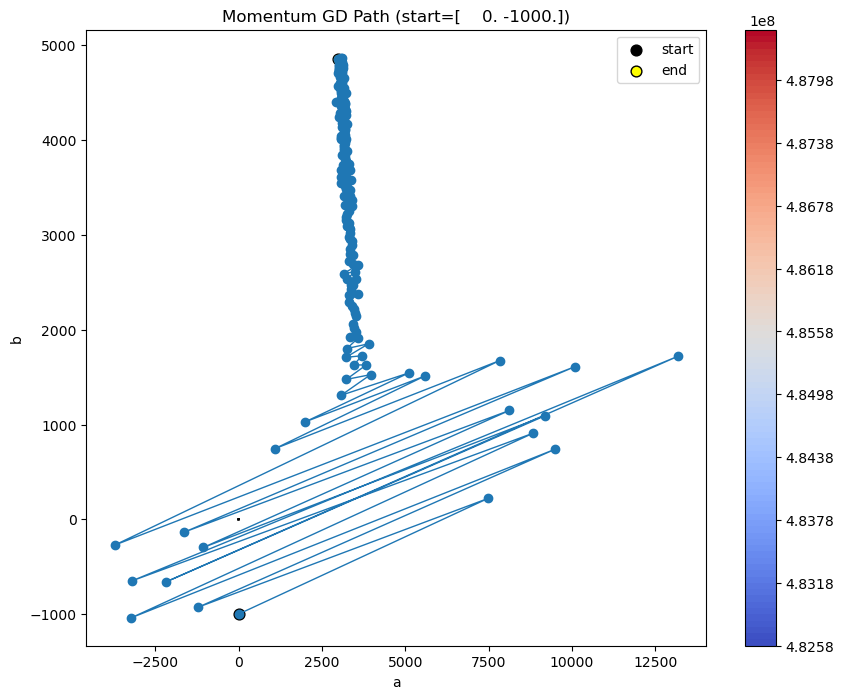

In [14]:


def plot_contour_figure(x_train, y_train):
    x = np.linspace(-10, 10, 200)
    y = np.linspace(-10, 10, 200)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            a_val = X[i, j]
            b_val = Y[i, j]
            y_pred = a_val * x_train + b_val
            Z[i, j] = np.mean((y_train - y_pred)**2)
    fig, ax = plt.subplots(figsize=(10, 8))
    cf = ax.contourf(X, Y, Z, 100, cmap='coolwarm')
    ax.contour(X, Y, Z, 20, colors='k', alpha=0.4)
    fig.colorbar(cf)
    ax.set_xlabel("a")
    ax.set_ylabel("b")
    return fig, ax


def show_path(title, path, x_train, y_train):
    fig, ax = plot_contour_figure(x_train, y_train)
    ax.plot(path[:, 0], path[:, 1], marker='o', linewidth=1)

    # FIXED start and end points colors
    ax.scatter(path[0, 0], path[0, 1], s=60, color='black', label='start')
    ax.scatter(path[-1, 0], path[-1, 1], s=60, color='yellow', edgecolors='k', label='end')

    ax.set_title(title)
    ax.legend()
    plt.show()

initial_guess = np.array([0.0, -1000.0])
alpha = 0.01
learning_rate = alpha
beta = 0.5
batch_size = 40

path = momentum_optimization_path(initial_guess, learning_rate, beta, batch_size)


print("Starting point:", initial_guess)


print("Final coordinates:", path[-1])
print("MSE at final:", mse_loss(path[-1], x_train, y_train))

# Plot the path
show_path(f"Momentum GD Path (start={initial_guess})", path, x_train, y_train)

Starting point: [    0. -1000.]
Final coordinates: [3003.10378513 5089.27937756]
MSE at final: 4069401.5495824376


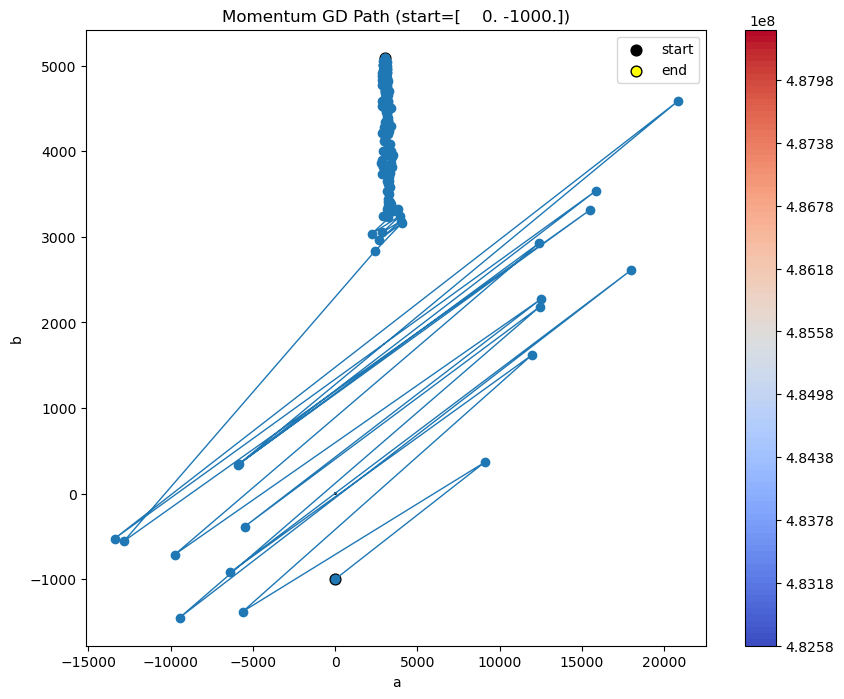

In [7]:
#solution 1.3

#Solution 1.2

def momentum_optimization_path(initial_guess, beta, alpha, batch_size, conv_criterion = 60, max_iter = 200):
    params_vec = initial_guess.copy()
    m = np.zeros_like(params_vec)
    path = [params_vec.copy()]

    for i in range (1, max_iter+1):
        alpha = alpha0 * (gamma**(i/k))
        xi = np.random.choice(len(x_train), batch_size, replace = False)
        x_batch, y_batch = x_train[xi], y_train[xi]
        s = mse_stochastic_gradient(params_vec, x_batch, y_batch)
        
        
        m = beta*m - alpha*s
        params_vec = params_vec + m

        path.append(params_vec.copy())

        if np.linalg.norm(s) < conv_criterion :
            break

    return np.vstack(path)






def plot_contour_figure(x_train, y_train):
    x = np.linspace(-10, 10, 200)
    y = np.linspace(-10, 10, 200)
    X, Y = np.meshgrid(x, y)

    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            a_val = X[i, j]
            b_val = Y[i, j]
            y_pred = a_val * x_train + b_val
            Z[i, j] = np.mean((y_train - y_pred)**2)
    fig, ax = plt.subplots(figsize=(10, 8))
    cf = ax.contourf(X, Y, Z, 100, cmap='coolwarm')
    ax.contour(X, Y, Z, 20, colors='k', alpha=0.4)
    fig.colorbar(cf)
    ax.set_xlabel("a")
    ax.set_ylabel("b")
    return fig, ax


def show_path(title, path, x_train, y_train):
    fig, ax = plot_contour_figure(x_train, y_train)
    ax.plot(path[:, 0], path[:, 1], marker='o', linewidth=1)

    # FIXED start and end points colors
    ax.scatter(path[0, 0], path[0, 1], s=60, color='black', label='start')
    ax.scatter(path[-1, 0], path[-1, 1], s=60, color='yellow', edgecolors='k', label='end')

    ax.set_title(title)
    ax.legend()
    plt.show()

initial_guess = np.array([0.0, -1000.0])
alpha0 = 0.03
learning_rate = alpha
beta = 0.9
batch_size = 20
gamma = 0.80
k = 50
path = momentum_optimization_path(initial_guess, alpha, beta, batch_size)


print("Starting point:", initial_guess)


print("Final coordinates:", path[-1])
print("MSE at final:", mse_loss(path[-1], x_train, y_train))

# Plot the path
show_path(f"Momentum GD Path (start={initial_guess})", path, x_train, y_train)


In [20]:
#solution 2.1

from sklearn.datasets import load_iris

np.random.seed(14)

iris_data = load_iris()
x = iris_data.data
y = iris_data.target



In [30]:
from sklearn.utils import shuffle

x, y = shuffle(x, y, random_state = 40)

train_x, test_x = [], []
train_y, test_y = [], []


for cls in np.unique(y):
    cl_ind = np.where(y==cls)[0]
    np.random.shuffle(cl_ind)


    train_ix = cl_ind[:40]
    test_ix = cl_ind[40:50]

    train_x.append(x[train_ix])
    test_x.append(x[test_ix])
    train_y.append(y[train_ix])
    test_y.append(y[test_ix])


train_x = np.vstack(train_x)
train_y = np.hstack(train_y)
test_x = np.vstack(test_x)
test_y = np.hstack(test_y)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(120, 4)
(120,)
(30, 4)
(30,)


/tmp/ipykernel_847778/1279025037.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))


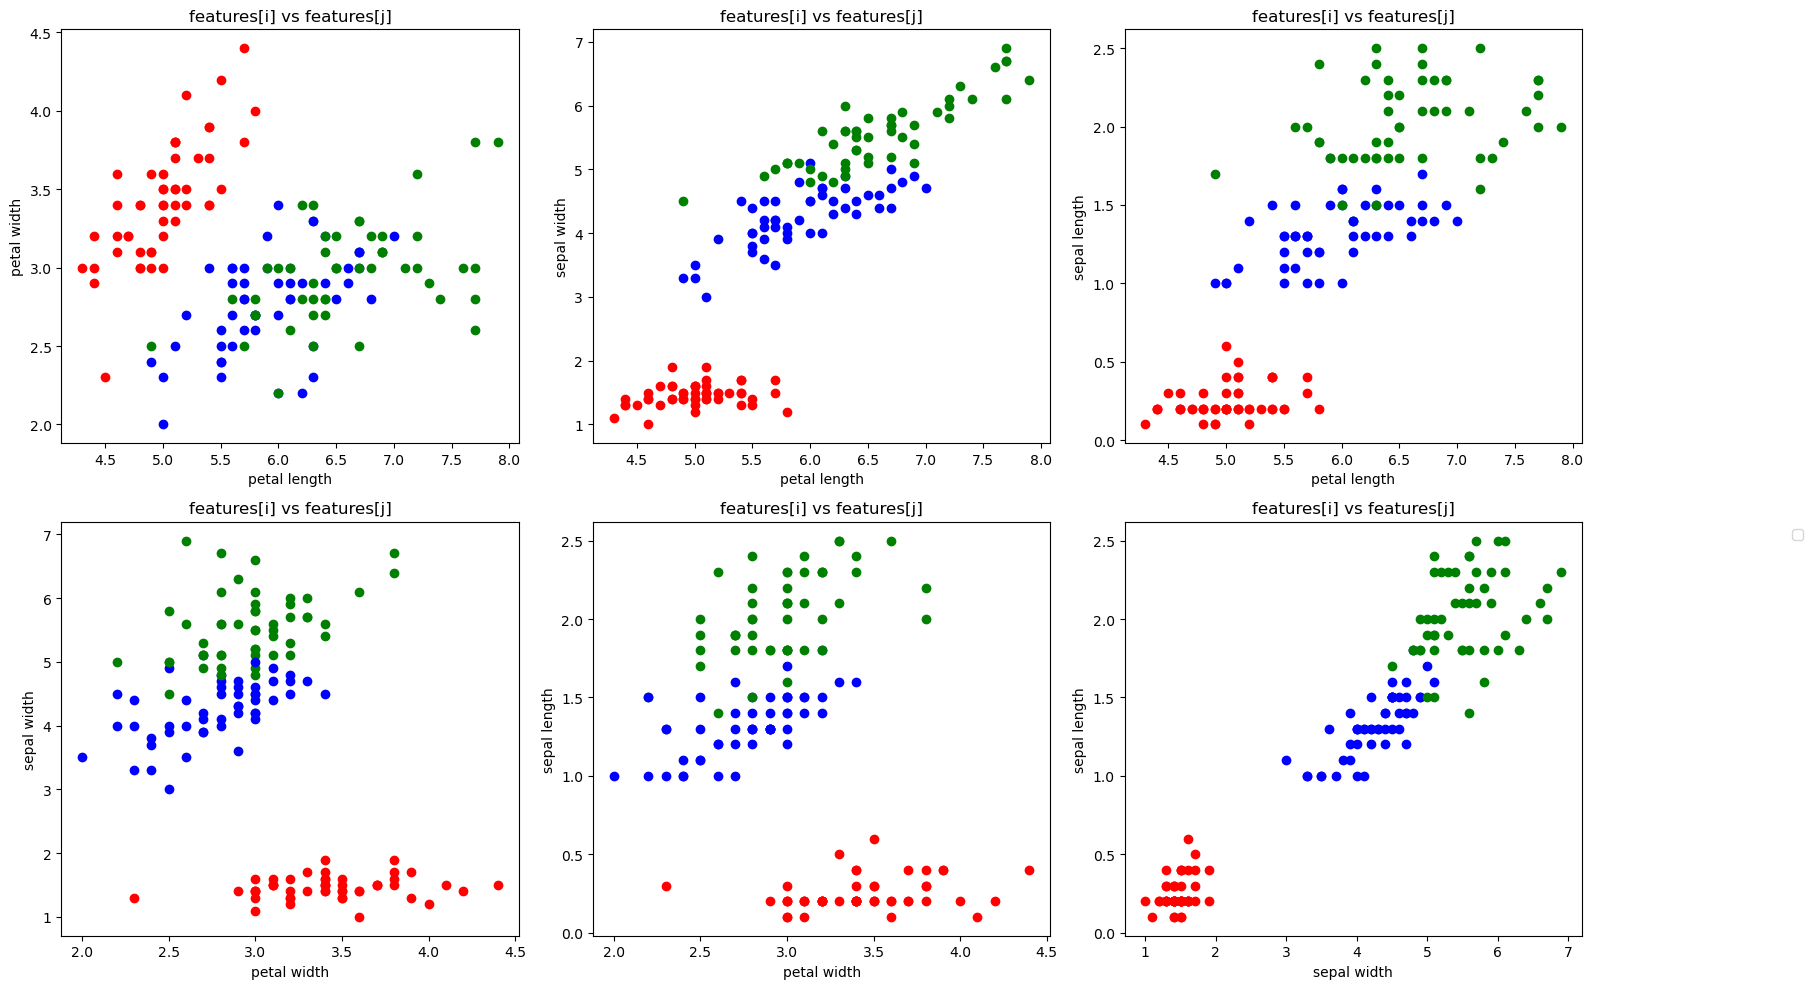

In [41]:
features = ['petal length', 'petal width', 'sepal width', 'sepal length']
colors = ['red', 'blue', 'green']

pairs = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]



fig, axes = plt.subplots(2, 3, figsize = (18,10))
axes = axes.flatten()

for idx, [i, j] in enumerate(pairs):
    ax = axes[idx]

    for cls in np.unique(train_y):
        pts = train_x[train_y == cls]
        ax.scatter(pts[:, i], pts[:, j], color = colors[int(cls)], label = f'TRain class {int(cls)})' if idx == 0 else None)


    for cls in np.unique(test_y):
        pts = test_x[test_y == cls]

        ax.scatter(pts[:, i], pts[:, j], color = colors[int(cls)], label = f'test class {int(cls)}' if idx == 0 else None)

    ax.set_xlabel(features[i])
    ax.set_ylabel(features[j])
    ax.set_title(f'features[i] vs features[j]')



plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.tight_layout()
plt.show()